Comparing Distributions with Probability Plots
===
> Q-Q plots, visually comparing distributions, and visual test for normality

---

*Notes on Probability Plots*:
- The theoretical quantiles are *quantile function* values.
- The *Quantile function* is also called as percent point function (*ppf*) or *the inverse distribution function*.
    - The *ppf* is the inverse of cumulative distribution function (*CDF*).
    - For CDF of a random variable $x$, $F(x) = p$, the ppf is $q=F^{-1}(p)$
- Use *ppf* of the standard normal distribution ($x\sim\mathcal{N}(0,1)$) to compute theoretical quantile values for normal distribution, and then compare them to the quantile of your sample data.
    - The *ppf* for the standard normal distribution is called as the **probit function**.

Further Reading:
- [Normal probability plot](https://itl.nist.gov/div898/handbook/eda/section3/normprpl.htm)
- [Probability plot](https://itl.nist.gov/div898/handbook/eda/section3/probplot.htm)
- [Quantile-Quantile plot](https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm)

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# plt.style.available

In [ ]:
plt.style.use(['seaborn-darkgrid',])
# for "dark" theme in jupyter lab : 'dark_background'
              
plt.rcParams['font.size']= 12 # default firgure font size

## Generate Data

In [4]:
np.random.seed(0) # set rng seed for reproducibility

X = { 'N(0,1)': np.random.normal(loc=0, scale=1.0, size=(100,)),
     'N(0,10)': np.random.normal(loc=0, scale=10.0, size=(150,)),
     'N(100,3)': np.random.normal(loc=100, scale=3.0, size=(100,)),
     'LogNorm(0,1)' : np.random.lognormal(mean=0.0, sigma=1.0, size=(100,)),
     'pareto(1)_1' : np.random.pareto(1, size=(100,)),
     'pareto(1)_2': np.random.pareto(1, size=(100,)),
    }

## Theoretical Quantiles for the Standard Normal Distribution

We will use `scipy.stats.norm.ppf` to calculate theoretical quantiles

In [5]:
from scipy.stats import norm

print('Quantiles:\n',
      f"Q5% : {norm.ppf(0.05):.3f}; Q50%: {norm.ppf(0.5):.3f}; Q95%: {norm.ppf(0.95):.3f}")

Quantiles:
 Q5% : -1.645; Q50%: 0.000; Q95%: 1.645


## A Simple Approach That Uses Numpy, Matplotlib, Scipy.Stats

### Compute quantiles using `np.quantile()`

`np.quantile` usage, e.g. estimating dataset median:

In [6]:
data_name = 'N(0,1)'
print(f'{data_name}; Median estimate:', np.quantile(X[data_name], 1/2)) # Median is 2-quantile

N(0,1); Median estimate: 0.09409611943799814


Compute quantiles for datasets:

In [7]:
p = np.linspace(0,1,100) # p=CDF(x) for 100 quantiles
Qs = {k:np.quantile(X[k], p) for k in X} # quantiles

Theoretical quantiles for the standard normal:

In [8]:
q_theory = norm.ppf(p) # ppf for the standard normal dist

### Plot Histograms and Compare Data to the Normal Distribution

\[*Histograms*\] --- \[*Quantiles*\] --- \[*Normal Probability Plots*\]
>Here we scale the standard normal distribution using data mean and standard deviation if `theory_line` is `'s'`

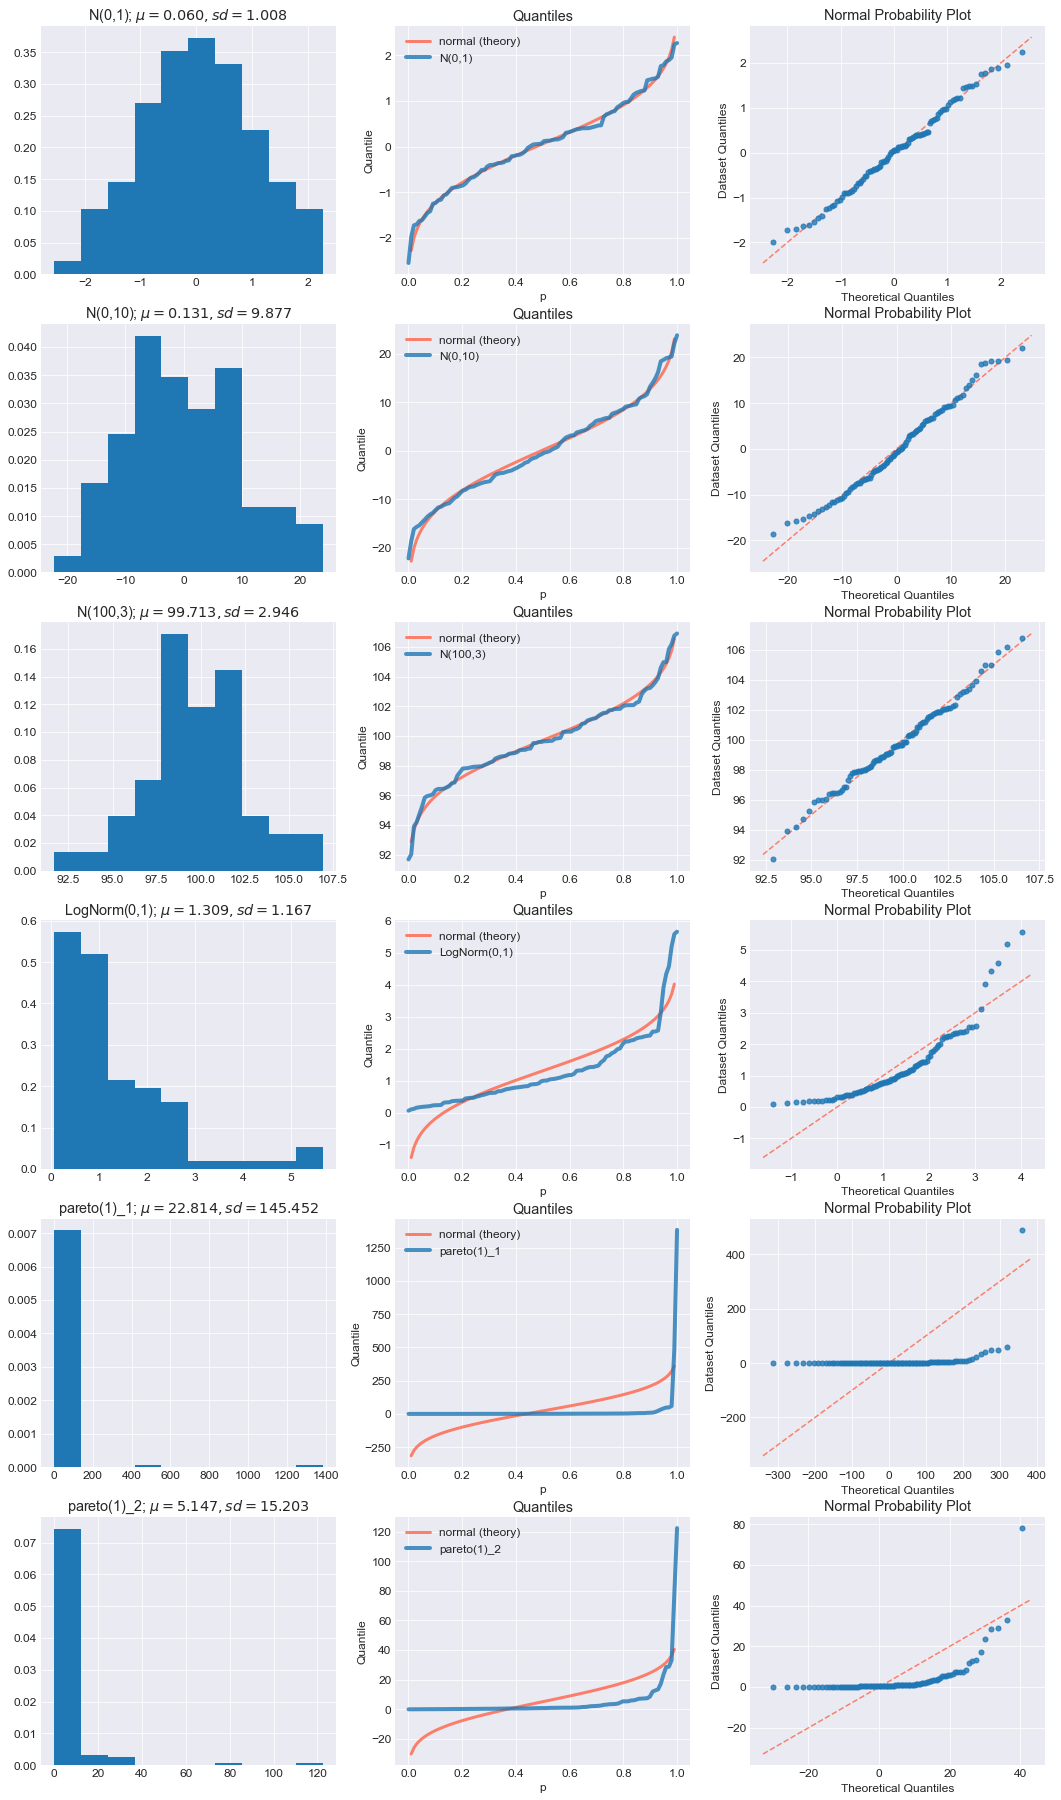

In [9]:
_,axs = plt.subplots(nrows=len(X), ncols=3, figsize=[18,5*len(X)+2])

theory_line = 's' # scale normal dist with sd and mean
# theory_line = '45' # the standard normal dist (not scaled)

for k,ax in zip(Qs, axs):
    # compute mean and standard deviation for a given distribution
    x_sd = X[k].std()
    x_mean = X[k].mean()
    
    if theory_line=='s':
        # scaled PROBIT FUNCTION values: use mean and sd to scale standard normal distribution
        nrm_theory = q_theory*x_sd+x_mean
    elif theory_line=='45':
        # theoretical quantile for the standard normal
        nrm_theory = q_theory
    
    # Draw histogram
    ax[0].hist(X[k], histtype='stepfilled', lw=4, density=True);
    ax[0].set_title(f'{k}; $\mu={x_mean:6.3f}, sd={x_sd:6.3f}$')
    
    #  Quantiles
    line_45 = [x_mean-2.5*x_sd,x_mean+2.5*x_sd]
    ax[1].plot(p, nrm_theory,'-',c='tomato', lw=3, alpha=.8, label='normal (theory)')
    # data quantiles:
    ax[1].plot(p, Qs[k], label=f'{k}', lw=4, alpha=.8)
    
    ax[1].set_xlabel('p')
    ax[1].set_ylabel('Quantile')
    ax[1].legend();
    ax[1].set_title('Quantiles')
    
    # Normal Probability Plot
    # scales 45-degree line
    ax[2].plot(line_45, line_45,'--',c='tomato',alpha=.8)
    # qq-plot
    ax[2].plot(nrm_theory, Qs[k],'o',ms=5, alpha=.8)
    ax[2].set_xlabel('Theoretical Quantiles')
    ax[2].set_ylabel('Dataset Quantiles')
    ax[2].set_title('Normal Probability Plot')
plt.show()

- Quantiles and the probability plots above contain the same information
- Compare these with the q-q plot from `statsmodels` (technically these are *normal probability plots*)
- Q-Q plots are use to compare to sets of sample data, e.g. x1 vs x2, when one of them are theoretical quantiles the plot is called probability plot.

---

In [10]:
from statsmodels.graphics.gofplots import qqplot

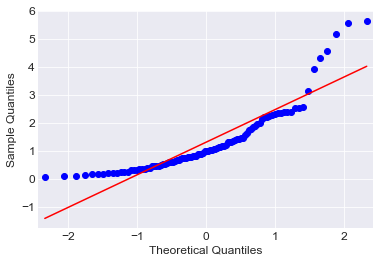

In [11]:
qqplot(X['LogNorm(0,1)'], line='s')  # also try line='45'
plt.show();

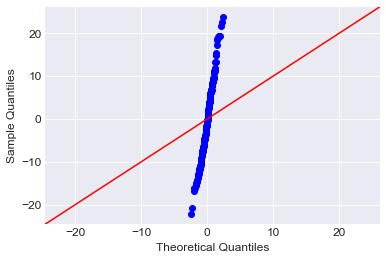

In [12]:
qqplot(X['N(0,10)'], line='45') # also try line='s'
plt.show();

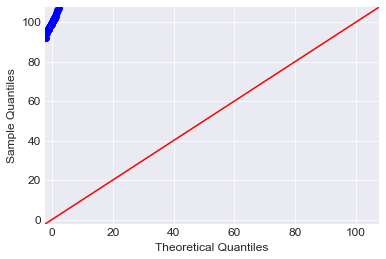

In [13]:
qqplot(X['N(100,3)'], line='45') # also try line='s'
plt.show();

### Comparing Data against Other Theoretical Distributions

*See help for probability plot ([`scipy.stats.probplot`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) )*

In [14]:
# Later:
# import scipy.stats.probplot and use it to plot prob-y plots

## Use Pandas and Seaborn to Store and Explore Data

Same data as above:

In [15]:
import pandas as pd

In [16]:
np.random.seed(0) # set rng seed for reproducibility

X = { 'N(0,1)': np.random.normal(loc=0, scale=1.0, size=(100,)),
     'N(0,10)': np.random.normal(loc=0, scale=10.0, size=(150,)),
     'N(100,3)': np.random.normal(loc=100, scale=3.0, size=(100,)),
     'LogNorm(0,1)' : np.random.lognormal(mean=0.0, sigma=1.0, size=(100,)),
     'pareto(1)_1' : np.random.pareto(1, size=(100,)),
     'pareto(1)_2': np.random.pareto(1, size=(100,)),
    }

### Data as a Pandas.DataFrame object

In [17]:
# [pd.DataFrame(data={"name":k, "x":X[k]}) for k in X] creates a list of DataFrame with two columns
# pd.concat() concatenates data frames in the list

X_df = pd.concat([pd.DataFrame(data={"name":k, "x":X[k]}) for k in X], axis=0)
X_df.head()

,name,x
0,"N(0,1)",1.764052
1,"N(0,1)",0.400157
2,"N(0,1)",0.978738
3,"N(0,1)",2.240893
4,"N(0,1)",1.867558


### Summary stat-s

In [18]:
X_df_stats = X_df.pivot_table(index='name', aggfunc=[np.mean, np.std, np.min, np.max, np.median])
X_df_stats

,mean,std,amin,amax,median
,x,x,x,x,x
name,,,,,
"LogNorm(0,1)",1.309217,1.172928,0.064591,5.656024,0.994109
"N(0,1)",0.059808,1.012960,-2.552990,2.269755,0.094096
"N(0,10)",0.130958,9.910353,-22.234032,23.831448,-0.552494
"N(100,3)",99.712609,2.961003,91.682222,106.911750,99.622202
pareto(1)_1,22.813589,146.184601,0.030875,1384.029892,0.865413
pareto(1)_2,5.147315,15.279490,0.001385,122.309567,0.834044


> **Question:**
>
> Why do the `std` differ from ones computed with `np.std` above? (*hint: `pivot_table` is using the same function since you supplied it with it, read `np.std` help*)

### Data Visualisation

- Individual histograms (group data by their "name")

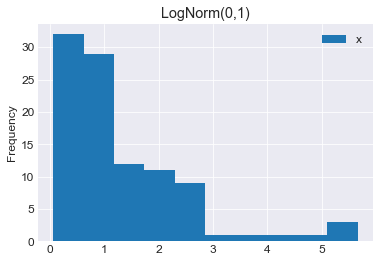

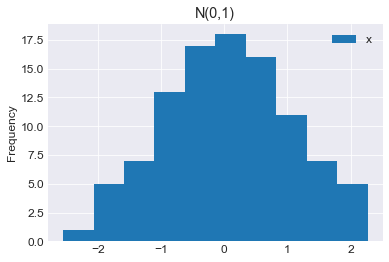

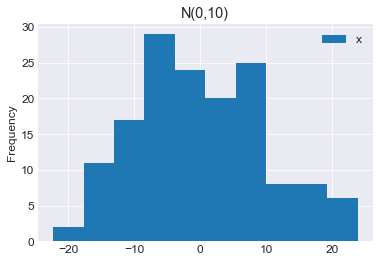

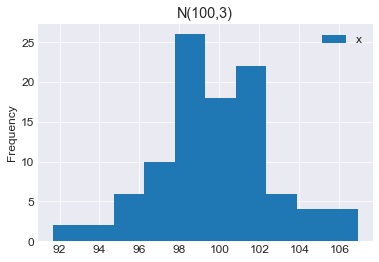

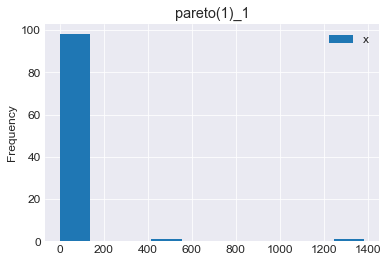

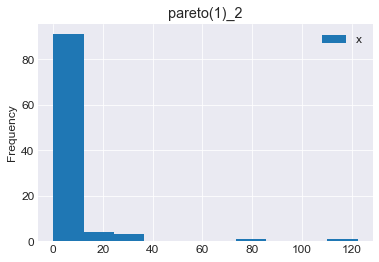

In [19]:
axs_hist = X_df.groupby(by='name').plot.hist()
for name_k in axs_hist.index:
    axs_hist.loc[name_k].set_title(name_k)

In [20]:
import seaborn as sns

- Histograms

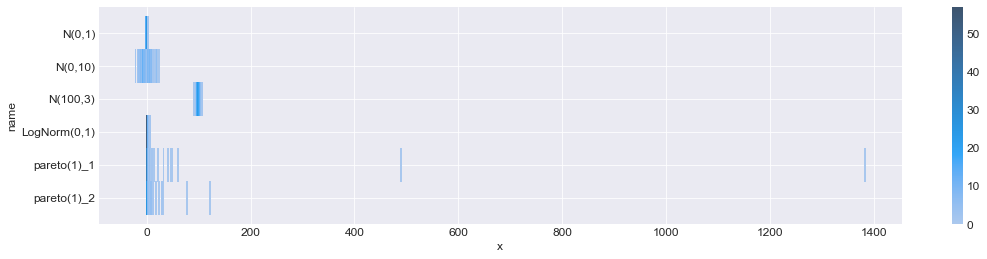

In [21]:
plt.figure(figsize=[18,4])
sns.histplot(x='x', y='name', data=X_df, legend=False, cbar=True);

- Swarmplots

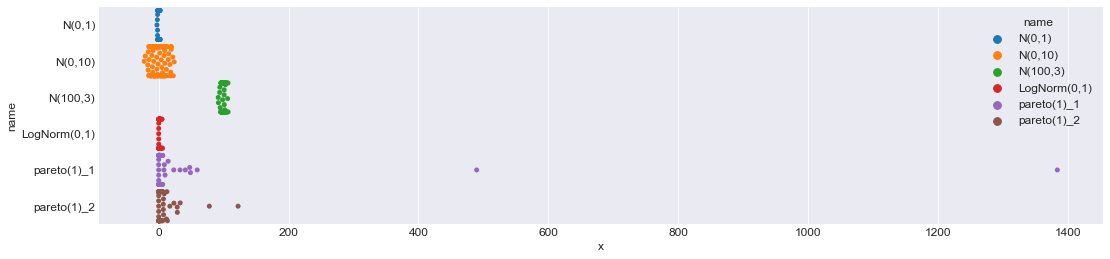

In [22]:
import warnings

plt.figure(figsize=[18,4])

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.swarmplot(y='name', hue='name', x='x', data=X_df, size=5)
    plt.show()

### Computing Quantiles

- Use `pd.DataFrame.groupby()` for group and then `quantile()` to compute quantiles:

In [23]:
p = np.linspace(0,1,100)
Qs_df = X_df.groupby(by='name').quantile(p)
Qs_df.index.names = ['name', 'p']
Qs_df

x
name         p                   
LogNorm(0,1) 0.000000    0.064591
             0.010101    0.104814
             0.020202    0.123119
             0.030303    0.158331
             0.040404    0.170582
...                           ...
pareto(1)_2  0.959596   28.539868
             0.969697   28.753024
             0.979798   33.166358
             0.989899   78.043617
             1.000000  122.309567

[600 rows x 1 columns]

---
- Select data for a given "name" (an index in `Qs_df`) using `Qs_df.loc[k]` where `k` is a "name" of the data.
- List all data "name" types with `Qs_df.index.levels[0]` (1st level of the multi-index in `Qs_df`)

---

*A step-by-step construction* of a data frame with `p` values as an index and columns as quantiles for different data:

In [24]:
# First column of quantiles for data with name "Qs_df.index.levels[0][0]"
Qs_p_multiline = Qs_df.loc[Qs_df.index.levels[0][0]].rename(columns={'x':Qs_df.index.levels[0][0]})

for k in Qs_df.index.levels[0][1:]:
    # in "Qs_df.loc[k]" dateframe rename "x" column as the value of "k"
    # then join it to the "Qs_p_multiline"
    Qs_p_multiline = Qs_p_multiline.join(Qs_df.loc[k].rename(columns={'x':k}))

# rename axis:
# Qs_p_multiline.rename_axis('p', inplace=True)

Qs_p_multiline

,"LogNorm(0,1)","N(0,1)","N(0,10)","N(100,3)",pareto(1)_1,pareto(1)_2
p,,,,,,
0.000000,0.064591,-2.552990,-22.234032,91.682222,0.030875,0.001385
0.010101,0.104814,-1.980796,-18.710046,92.022483,0.041250,0.003875
0.020202,0.123119,-1.726283,-16.168056,93.907947,0.062174,0.019496
0.030303,0.158331,-1.706270,-15.725464,94.191161,0.063767,0.029816
0.040404,0.170582,-1.630198,-15.397962,94.732328,0.065052,0.030068
...,...,...,...,...,...,...
0.959596,4.334381,1.867558,19.095212,104.978652,47.844651,28.539868
0.969697,4.572202,1.895889,19.261372,105.867737,48.905993,28.753024
0.979798,5.197278,1.950775,19.434789,106.193479,59.336347,33.166358


---
> **Tasks:**
>1. Read `pd.concat` help. What can the `objs` input be? What does `axis` argument do?
>1. What do `Qs_df.index.levels[0]`, `Qs_df.loc['N(0,1)']`, and `Qs_df.loc['N(0,1)']['x']` return?
>1. You can use dict for mapping dataframes to keys, e.g. `{k: df.loc[k]['x'] for k in df_indices}`
>1. Fill in blank spaces below (`_`) to construct the same quantiles dataframe with `pandas.concat()`
```python
Qs_p = pd.concat({ _ : _ for k in _ }, axis= _ )
```

---

In [ ]:
Qs_p = pd.concat({ _ : _ for k in _ }, axis=_)
Qs_p

### Probability Plots Task

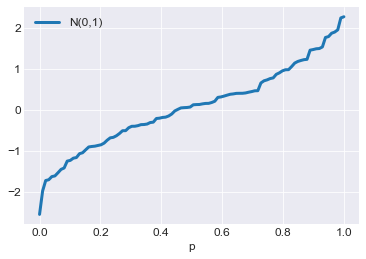

In [25]:
Qs_p_multiline.plot.line(y='N(0,1)', lw=3);

> **Tasks:**
> Reproduce and modify subplots from the section called *"Plot Histograms and Compare Data to the Normal Distribution"*
> 1. Add KDE plot to the histograms, e.g. produce a similar plot to the following
>
> <img src="../images/hist_with_kde.jpg" width="200">
>
> 2. Plot the quantile plots,  e.g.
>
> <img src="../images/quantile_plot.jpg" width="200">
>
> 3. Produce probability plots with `pd.DataFrame.plot` and/or `seaborn`
>
> <img src="../images/prob_plot.jpg" width="200">


- Theoretical standard normal quantiles:

In [ ]:
# ppf for the standard normal dist
Qs_p['theoretical'] =  norm.ppf(Qs_p.index.values)
Qs_p

In [ ]:
theory_line = 's'

_, axs = plt.subplots(nrows=len(Qs_p.columns)-1, ncols=3, figsize=[18, 5*len(Qs_p.columns)-1+2])
for ax_k, k in zip(axs, Qs_p.columns):
    if k=='theoretical':
        continue

    # # # # # # # # # # # # # # # # # # # # # # # #
    # Histogram plots
    #
    # 1. Plot histogram with kerner density estimation ("kde") for the sample data
    #    1-1. Explore help for "pd.DataFrame.plot.hist" and "pd.DataFrame.plot.density"
    #    1-2. Plot KDE plot for the sample data with a green line (e.g. color='g')
    #    1-3. Change input arg-s to "plot.hist" or "plot.density" to scale the histogram and KDE plots correctly.
    #    1-4. "ax_k[0].legend()" to correctly label KDE and histogram.
    X_df[X_df['name']==k].plot.hist(ax=ax_k[0], alpha=.5)
    # plot KDE:
    # ...plot.density(...)

    # Label KDE and Histogram
    # ax_k[0].legend(...)

    # Set subplot title with the "sample name"+"mean"+"std"
    # ax_k[0].set_title(...)
    
    # # # # # # # # # # # # # # # # # # # # # # # #
    # Quantile plots
    #
    # 2. Plot quantile plot of the sample data
    #    use "pd.DataFrame.plot.line" of the "Qs_p" (or "Qs_p_multiline")
    #    e.g.: Qs_p_multiline.plot.line(...)
    # Theoretical quantiles
    if theory_line=='s':
        d_mean = X_df_stats['mean'].loc[k].values
        d_std = X_df_stats['std'].loc[k].values
        
        # scaled PROBIT FUNCTION values: use mean and sd to scale standard normal distribution
        nrm_theory = Qs_p['theoretical']*d_std+d_mean
        
        
    elif theory_line=='45':
        # theoretical quantile for the standard normal
        nrm_theory = q_theory
    ax_k[1].plot(p, nrm_theory,c='orange', label='normal (theory)')
    
    # label y-axis as "Quantile"
    # (...)
    
    ax_k[1].set_title('Quantiles')
    ax_k[1].legend()
    
    # # # # # # # # # # # # # # # # # # # # # # # #
    # Probability plots
    #
    # 3. Plot probability plots with 45-degree line

    # Plot 45-degree line
    # ax_k[2].plot(...)
    
    # Plot normal prob-y plot
    # sns.lineplot(...)
    
    # Set title and axis labels
    #
    